In [2]:
!pip install earthpy

     |████████████████████████████████| 1.4MB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.1MB 225kB/s 
     |████████████████████████████████| 972kB 34.9MB/s 
     |████████████████████████████████| 14.8MB 316kB/s 
     |████████████████████████████████| 10.9MB 10.9MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=5fbae7e970c15618766a19da6602f5410a12351d0ef33c8b20385d298643e956
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [3]:
!pip install rasterio

In [4]:
import rasterio as rio
import numpy
import earthpy.plot as ep
from rasterio.plot import show
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.preprocessing import minmax_scale
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/AlgaeBloom

/content/drive/My Drive/AlgaeBloom


In [7]:
all_sentinel_bands = glob(
    "upvanlake/*B*.jp2")

all_sentinel_bands.sort()
all_sentinel_bands

['upvanlake/T43QBB_20200412T053639_B01.jp2',
 'upvanlake/T43QBB_20200412T053639_B02.jp2',
 'upvanlake/T43QBB_20200412T053639_B03.jp2',
 'upvanlake/T43QBB_20200412T053639_B04.jp2',
 'upvanlake/T43QBB_20200412T053639_B05.jp2',
 'upvanlake/T43QBB_20200412T053639_B06.jp2',
 'upvanlake/T43QBB_20200412T053639_B07.jp2',
 'upvanlake/T43QBB_20200412T053639_B08.jp2',
 'upvanlake/T43QBB_20200412T053639_B09.jp2',
 'upvanlake/T43QBB_20200412T053639_B10.jp2',
 'upvanlake/T43QBB_20200412T053639_B11.jp2',
 'upvanlake/T43QBB_20200412T053639_B12.jp2',
 'upvanlake/T43QBB_20200412T053639_B8A.jp2',
 'upvanlake/T43QBB_20200412T053639_TCI.jp2']

In [7]:
# run once, only to generate the RGB composite image.
b4 = rio.open(all_sentinel_bands[3])
b3 = rio.open(all_sentinel_bands[2])
b2 = rio.open(all_sentinel_bands[1])


# Create an RGB image 
with rio.open('lake/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b2.read(1),3) 
    rgb.close()

In [8]:
#get the shape of RGB image created
with rio.open('lake/RGB.tiff') as rgb_f:
  data = rgb_f.read()

data.shape

(3, 10980, 10980)

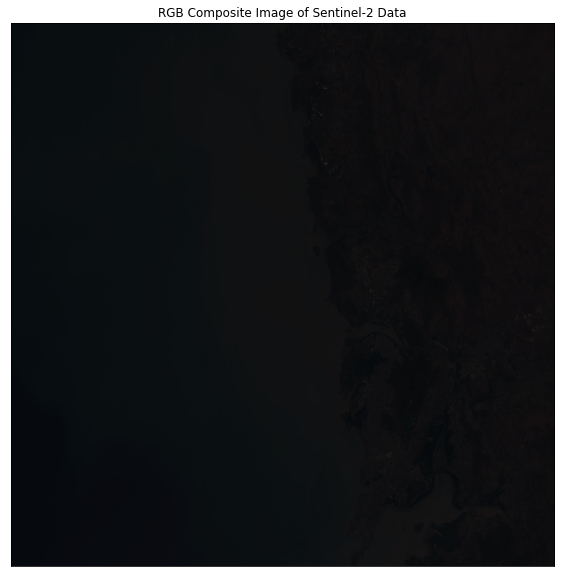

In [9]:
#plot rgb
ep.plot_rgb(data, rgb=(0,1,2), title='RGB Composite Image of Sentinel-2 Data')

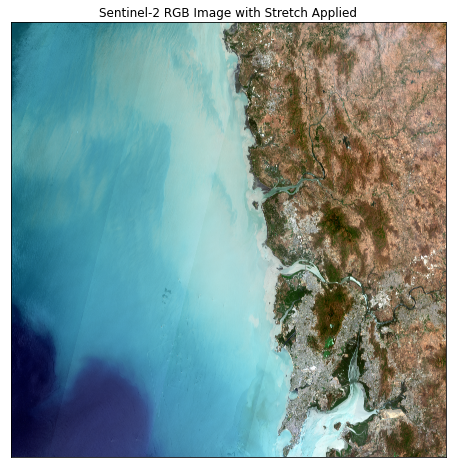

In [10]:
#rgb with stretch
ep.plot_rgb(
    data,
    rgb=(0,1,2),
    stretch=True,
    str_clip=0.5,
    figsize=(8,8),
    title="Sentinel-2 RGB Image with Stretch Applied",
)

plt.show()

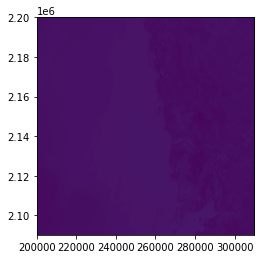

In [8]:
img2_458 = rio.open(all_sentinel_bands[1])
show(img2_458)

In [9]:
array458=img2_458.read()
array458.shape

(1, 10980, 10980)

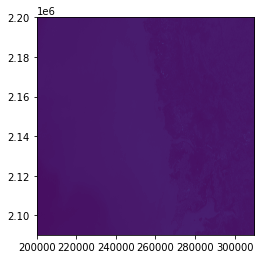

In [10]:
img3_529 = rio.open(all_sentinel_bands[2])
show(img3_529)

In [11]:
array529=img3_529.read()
array529.shape

(1, 10980, 10980)

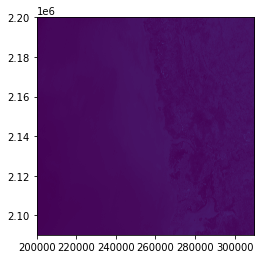

In [12]:
img4_644 = rio.open(all_sentinel_bands[3])
show(img4_644)

In [13]:
array644=img4_644.read()
array644.shape

(1, 10980, 10980)

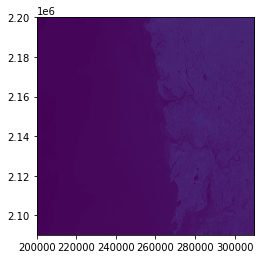

In [14]:
img8_857 = rio.open(all_sentinel_bands[7])
show(img8_857)

In [15]:
array857=img8_857.read()
array857.shape

(1, 10980, 10980)

In [16]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

NDWI Shape:  (1, 10980, 10980)


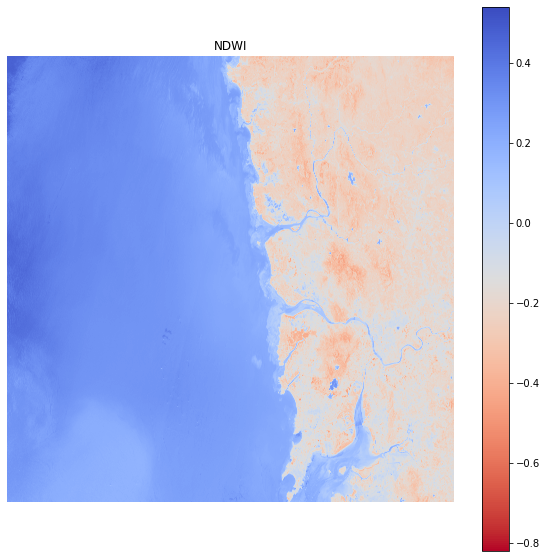

In [17]:
ndwi2 = (array529.astype(float)-array857.astype(float))/(array529+array857)
show_band(ndwi2, title='NDWI', size=(10,10), cmap='coolwarm_r')

In [18]:
ndwi2

array([[[ 0.47174949,  0.4739011 ,  0.47654657, ..., -0.32342928,
         -0.32673267, -0.31239987],
        [ 0.47432432,  0.48010974,  0.4772573 , ..., -0.31573987,
         -0.32269171, -0.33477589],
        [ 0.47303754,  0.48010974,  0.47275204, ..., -0.30848089,
         -0.29940308, -0.31916244],
        ...,
        [ 0.26554499,  0.28458498,  0.2458138 , ..., -0.18253717,
         -0.16831683, -0.19114497],
        [ 0.26263345,  0.26812585,  0.25983146, ..., -0.25221645,
         -0.19301415, -0.23158173],
        [ 0.22335025,  0.23056478,  0.25879044, ..., -0.28756158,
         -0.21723519, -0.27691822]]])

In [19]:
chlorophylla=[(array857[i] - array644[i])/(array458[i] + array529[i]) for i in range(len(array857))]

In [20]:
cha=numpy.array(chlorophylla)

In [21]:
cha.shape

(1, 10980, 10980)

In [22]:
min=numpy.amin(cha)
min

0.0

In [23]:
max=numpy.amax(cha)
max

35.34789644012945

In [24]:
cha

array([[[27.60854846, 27.77266922, 27.59517766, ...,  0.42472885,
          0.43407797,  0.41574525],
        [27.43103448, 27.46568421, 27.37263953, ...,  0.38037343,
          0.43708609,  0.50312221],
        [27.54940878, 27.38581024, 27.57843552, ...,  0.3609087 ,
          0.36728528,  0.44533333],
        ...,
        [31.8218111 , 29.5608322 , 30.52427638, ...,  0.17314221,
          0.1671397 ,  0.18309038],
        [31.20954654, 30.48997669, 30.81565299, ...,  0.32238924,
          0.22279223,  0.30250348],
        [29.06571936, 30.09438306, 30.8715163 , ...,  0.44220261,
          0.27421438,  0.4261745 ]]])

In [25]:
ndwi2.shape

(1, 10980, 10980)

In [26]:
ndwi2pl=[]

In [27]:
for i in range(1):
  for j in range(1):
    for k in range(7900,8500):
      ndwi2pl.append(ndwi2[i][k][7800:8400])

In [28]:
cha_pl=[]

In [29]:
for i in range(1):
  for j in range(1):
    for k in range(7900,8500):
      cha_pl.append(cha[i][k][7800:8400])

In [30]:
cha_pl_arr=numpy.array(cha_pl)
cha_pl_arr

array([[0.22328767, 0.19683258, 0.15763547, ..., 0.58488121, 0.44154715,
        0.45576408],
       [0.23912068, 0.21114106, 0.17951002, ..., 0.70137962, 0.47877462,
        0.51892606],
       [0.22197607, 0.21187584, 0.19561325, ..., 0.83310088, 0.60226757,
        0.70528736],
       ...,
       [0.10933527, 0.19834385, 0.20856685, ..., 0.26039698, 0.2456057 ,
        0.22227488],
       [0.30638642, 0.33667921, 0.2563791 , ..., 0.2507109 , 0.21989529,
        0.22106262],
       [0.25812693, 0.25605399, 0.20221607, ..., 0.22798667, 0.19760766,
        0.21380952]])

In [31]:
ndwi2pl=numpy.array(ndwi2pl)

In [32]:
ndwi2pl.shape

(600, 600)

In [33]:
for j in range(len(cha_pl_arr)):
  for k in range(len(cha_pl_arr[j])):
    if(ndwi2pl[j][k]<0):
      cha_pl_arr[j][k]=0.0

In [34]:
cha_pl_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
numpy.amax(cha_pl_arr)

32.612742658038826

In [36]:
for i in range(len(cha_pl_arr)):
  for j in range(len(cha_pl_arr[i])):
    cha_pl_arr[i][j]=((cha_pl_arr[i][j]/max))

In [37]:
cha_pl_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
cha_pl_arr.shape

(600, 600)

In [39]:
powailake=[cha_pl_arr]
powailake=numpy.array(powailake)
powailake

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [40]:
def show_band(img, title='', size=(20,10), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()


In [41]:
numpy.amin(powailake)

0.0

In [42]:
numpy.amax(powailake)

0.9226218797284501

Chlorophyll Values Shape:  (1, 600, 600)


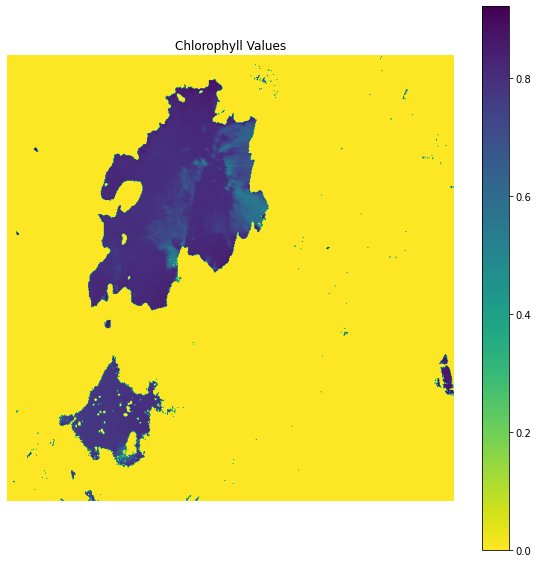

In [43]:
show_band(powailake, title='Chlorophyll Values', size=(10,10), cmap="viridis_r")

In [44]:
# Define bins that you want, and then classify the data
powai_class_bins = [0, 0.3, 0.6, 0.7, 0.8, 1]
powai_sentinel_class = np.digitize(powailake, powai_class_bins)

print(np.unique(powai_sentinel_class))

[1 2 3 4 5]


In [45]:
powai_sentinel_class.shape

(1, 600, 600)

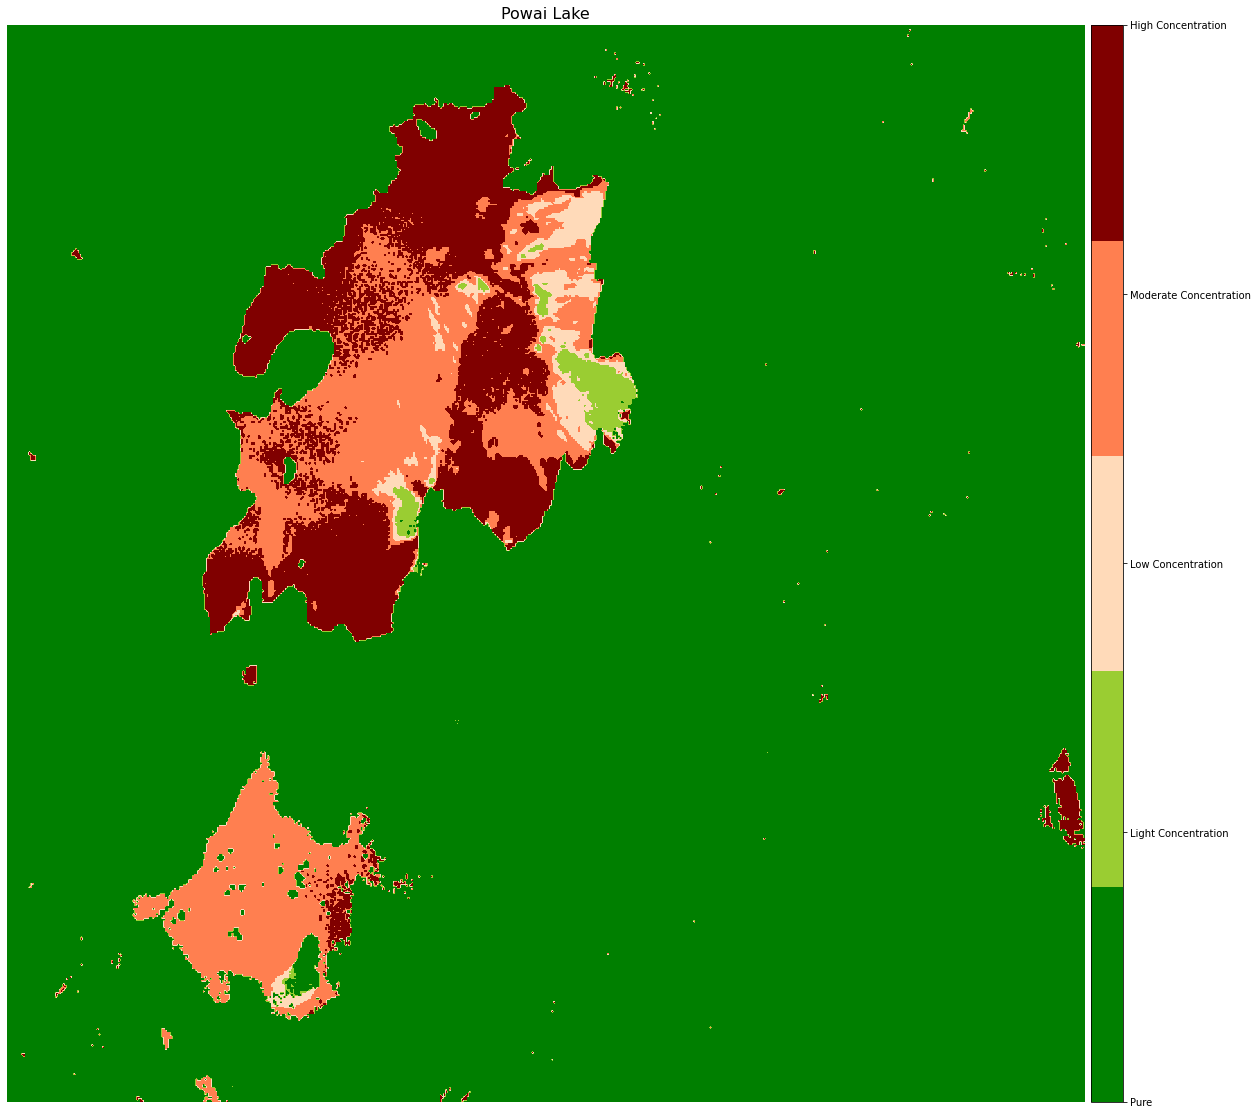

In [46]:
powai_cat_names = ["Pure",
                  "Light Concentration",
                  "Low Concentration",
                  "Moderate Concentration",
                  "High Concentration"]

nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]

nbr_cmap = ListedColormap(nbr_colors)

# Plot the data with a custom legend
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(powai_sentinel_class.reshape(powai_sentinel_class.shape[1:3]), cmap=nbr_cmap)

ax.set_title("Powai Lake",
             fontsize=16)

cbar = ep.colorbar(im)

cbar.set_ticks(np.unique(powai_sentinel_class))
cbar.set_ticklabels(powai_cat_names)

# Turn off ticks
ax.set_axis_off()
plt.show()

In [47]:
array644

array([[[ 685,  681,  686, ..., 1159, 1153, 1108],
        [ 694,  684,  692, ..., 1218, 1123, 1031],
        [ 685,  682,  700, ..., 1264, 1217, 1077],
        ...,
        [ 676,  720,  716, ..., 1410, 1653, 1874],
        [ 670,  670,  703, ..., 1233, 1373, 1462],
        [ 692,  750,  708, ..., 1039, 1058, 1006]]], dtype=uint16)

In [48]:
a=array644.astype('float64')

In [49]:
a.shape

(1, 10980, 10980)

In [50]:
a

array([[[ 685.,  681.,  686., ..., 1159., 1153., 1108.],
        [ 694.,  684.,  692., ..., 1218., 1123., 1031.],
        [ 685.,  682.,  700., ..., 1264., 1217., 1077.],
        ...,
        [ 676.,  720.,  716., ..., 1410., 1653., 1874.],
        [ 670.,  670.,  703., ..., 1233., 1373., 1462.],
        [ 692.,  750.,  708., ..., 1039., 1058., 1006.]]])

In [51]:
array857

array([[[ 388,  383,  385, ..., 2138, 2144, 2048],
        [ 389,  379,  385, ..., 2094, 2113, 2159],
        [ 386,  379,  387, ..., 2106, 2068, 2079],
        ...,
        [ 502,  543,  563, ..., 1869, 2183, 2502],
        [ 518,  535,  527, ..., 2048, 1981, 2332],
        [ 612,  579,  527, ..., 2091, 1695, 2022]]], dtype=uint16)

In [52]:
b=array644.astype('float64')

In [53]:
b.shape

(1, 10980, 10980)

In [54]:
array529

array([[[1081, 1073, 1086, ..., 1093, 1088, 1073],
        [1091, 1079, 1088, ..., 1089, 1082, 1076],
        [1079, 1079, 1081, ..., 1113, 1115, 1073],
        ...,
        [ 865,  975,  930, ..., 1292, 1554, 1699],
        [ 887,  927,  897, ..., 1223, 1340, 1455],
        [ 964,  926,  895, ..., 1157, 1090, 1145]]], dtype=uint16)

In [55]:
c=array529.astype('float64')

In [56]:
c.shape

(1, 10980, 10980)

In [57]:
c

array([[[1081., 1073., 1086., ..., 1093., 1088., 1073.],
        [1091., 1079., 1088., ..., 1089., 1082., 1076.],
        [1079., 1079., 1081., ..., 1113., 1115., 1073.],
        ...,
        [ 865.,  975.,  930., ..., 1292., 1554., 1699.],
        [ 887.,  927.,  897., ..., 1223., 1340., 1455.],
        [ 964.,  926.,  895., ..., 1157., 1090., 1145.]]])

In [58]:
pca=[((a[i])-(b[i]+(c[i] - b[i]))) for i in range(len(array857))]

In [59]:
pca=numpy.array(pca)
pca

array([[[-396., -392., -400., ...,   66.,   65.,   35.],
        [-397., -395., -396., ...,  129.,   41.,  -45.],
        [-394., -397., -381., ...,  151.,  102.,    4.],
        ...,
        [-189., -255., -214., ...,  118.,   99.,  175.],
        [-217., -257., -194., ...,   10.,   33.,    7.],
        [-272., -176., -187., ..., -118.,  -32., -139.]]])

In [60]:
min=numpy.amin(pca)
min

-2808.0

In [61]:
max=numpy.amax(pca)
max

5990.0

In [100]:
pca.shape

(1, 10980, 10980)

In [81]:
pca_pl=[]

In [82]:
for i in range(1):
  for j in range(1):
    for k in range(7900,8500):
      pca_pl.append(pca[i][k][7800:8400])

In [83]:
pca_pl=numpy.array(pca_pl)

In [101]:
pca_pl.shape

(600, 600)

In [102]:
for j in range(len(pca_pl)):
  for k in range(len(pca_pl[j])):
    if(ndwi2pl[j][k]<0):
      pca_pl[j][k]=0.0

In [103]:
pca_pl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
min=numpy.amin(pca_pl)
min

0.0

In [109]:
max=numpy.amax(pca_pl)
max

1.0

In [110]:
for i in range(len(pca_pl)):
  for j in range(len(pca_pl[i])):
    pca_pl[i][j]=(pca_pl[i][j]/max)

In [112]:
pca_pl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
pca_pl=numpy.array(pca_pl)

In [114]:
pca_pl.shape

(600, 600)

In [115]:
powailake_pca=[pca_pl]
powailake_pca=numpy.array(powailake_pca)
powailake_pca

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [116]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[1], img.shape[2]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

PCA Values Shape:  (1, 600, 600)


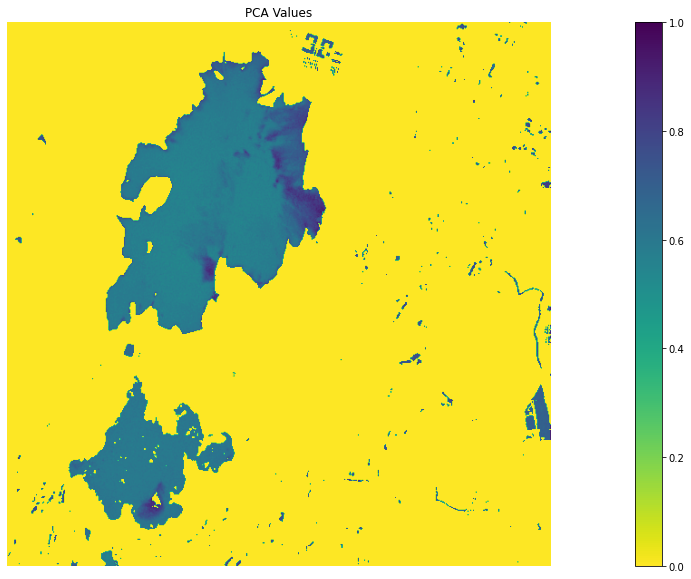

In [117]:
show_band(powailake_pca, title='PCA Values', size=(30,10), cmap="viridis_r")

In [124]:
turbidity=array644/array529

In [125]:
turbidity

array([[[0.63367253, 0.63466915, 0.63167587, ..., 1.06038426,
         1.05974265, 1.03261883],
        [0.63611366, 0.6339203 , 0.63602941, ..., 1.1184573 ,
         1.03789279, 0.95817844],
        [0.63484708, 0.63206673, 0.64754857, ..., 1.13566936,
         1.09147982, 1.00372787],
        ...,
        [0.78150289, 0.73846154, 0.76989247, ..., 1.09133127,
         1.06370656, 1.10300177],
        [0.75535513, 0.7227616 , 0.78372352, ..., 1.00817661,
         1.02462687, 1.004811  ],
        [0.71784232, 0.80993521, 0.79106145, ..., 0.8980121 ,
         0.9706422 , 0.87860262]]])

In [126]:
turbidity_pl=[]

In [127]:
for i in range(1):
  for j in range(1):
    for k in range(7900,8500):
      turbidity_pl.append(turbidity[i][k][7800:8400])

In [128]:
for j in range(len(turbidity_pl)):
  for k in range(len(turbidity_pl[j])):
    if(ndwi2pl[j][k]<0):
      turbidity_pl[j][k]=0.0

In [129]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()

In [130]:
numpy.amin(turbidity_pl)

0.0

In [131]:
numpy.amax(turbidity_pl)

1.0658333333333334

In [132]:
turbidity_pl=numpy.array(turbidity_pl)

Turbidity Values Shape:  (600, 600)


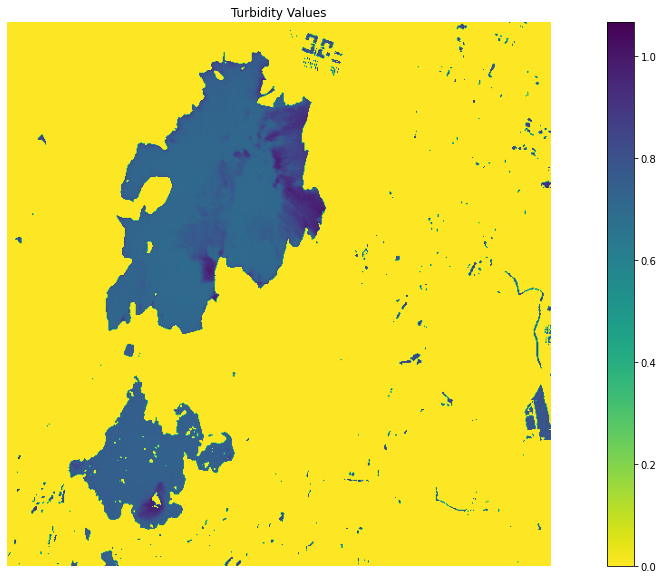

In [133]:
show_band(turbidity_pl, title='Turbidity Values', size=(20,10), cmap="viridis_r")